In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

dir_path = os.path.abspath('')
sys.path.append(dir_path + '/../')
FILE = dir_path + '/data/' + 'soglia_diodo_decrescente.csv'

from interpolazione import RettaInterpolata, Interpolazione, final_val

In [168]:
fr = pd.read_csv(FILE)
I = np.array(fr['I(uA)']) * 10**(-6)
sigmaIpercent = 0.01 # 1%
sigmaI = I*sigmaIpercent

V = np.array(fr['V'])
sigmaVpercent = 0.01 # 1%
sigmaV = V*sigmaVpercent

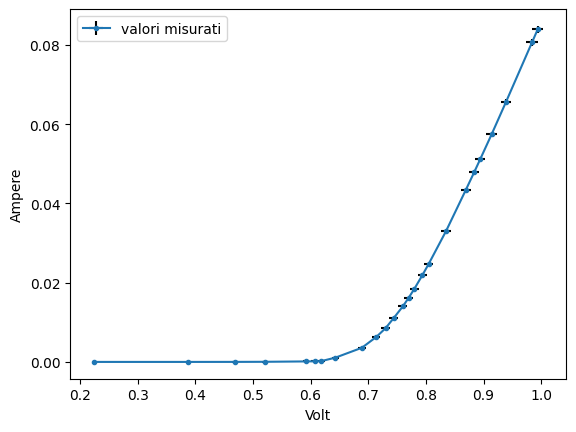

In [169]:
plt.title('')
plt.errorbar(V,I,yerr=sigmaI,xerr=sigmaV,marker='.',ecolor='black', label='valori misurati')
plt.xlabel('Volt')
plt.ylabel('Ampere')
# plt.yscale('log')
plt.legend()
plt.show()

In [170]:
def f(V,I0,coeff):
    return (I0 * (np.exp(coeff*V) - 1))

k = 10
# sigma = np.sqrt(sigmaI**2 + sigmaV**2)
# i = Interpolazione(V[:k],I[:k],f,sigma[:k],p0=[0.00001,0.05])
# i = RettaInterpolata(V,np.log(I),np.log(sigmaI))
# print(i)

### Valore di sogliola

$
X_s = -\frac{A}{B}
$

$
\sigma_{X_s} = \sqrt{\left(\frac{\partial X_s}{\partial A}\right)^2\sigma_A^2 + \left(\frac{\partial X_s}{\partial B}\right)^2\sigma_B^2}
$

$
\frac{\partial X_s}{\partial A} = -\frac{1}{B} \quad \frac{\partial X_s}{\partial B} = \frac{A}{B^2}
$

$
\sigma_{X_s} = \sqrt{\frac{\sigma_A^2}{B^2} + \frac{A^2}{B^4}\sigma_B^2}
$

Valore di sogliola:  0.734 ± 0.013 V


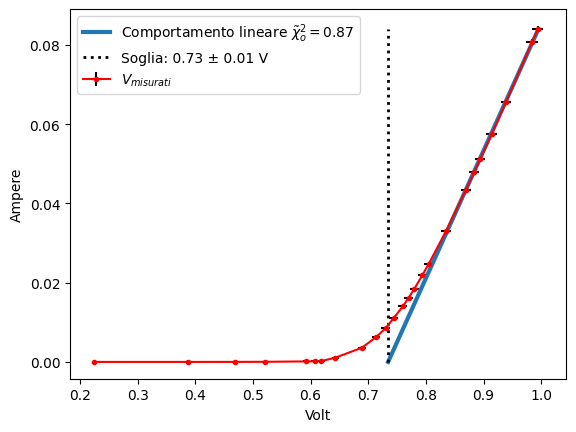


linearità A + BX
    
A: -0.2365304916486405 
B: 0.3220723277983215
sigmaA: 0.003330319254953677
sigmaB: 0.0036373351271087235

sigmaY: [0.0008395  0.00080623 0.0006563  0.00057443 0.00051095 0.0004795
 0.0004334  0.0003304 ]    
chiquadro ridotto: 0.87
df: 6
pvalue: 99.0%


In [171]:
N = 8
r = RettaInterpolata(V[:N],I[:N],sigmaI[:N])

plt.errorbar(V,I,yerr=sigmaI,xerr=sigmaV,color='red',marker='.',ecolor='black', label='$V_{misurati}$')
# plt.plot(i.x_best,i.y_best, color='palegreen',label='fit')

y = np.linspace(0,I[0],100)
x = (y-r.A)/r.B

# VALORE DI SOGLIOLA
sa,sb = r.sigmaA,r.sigmaB
A,B = r.A,r.B
sogliola = -A/B
ss = np.sqrt(sa**2/B**2 + (A**2/B**4) * sb**2)
print('Valore di sogliola: ',final_val(sogliola,ss,decimals=3,udm='V'))

plt.plot(x,y, label='Comportamento lineare $\\tilde{\chi}_o^2 = 0.87$',linewidth=3)

plt.vlines(x=sogliola,ymax=max(I),ymin=0,linewidths=2.0,label="Soglia: 0.73 ± 0.01 V", \
    color='black',linestyle="dotted")

plt.legend()
plt.xlabel('Volt')
plt.ylabel('Ampere')
plt.show()

print(r)

   
Parameters: [2.92156049e-10 1.63878952e+00] 
Sigma parameters: [3.36678375e-10 1.11144785e-01]

sigmaY: [8.509e-05 6.312e-05 3.580e-05 1.080e-05 1.900e-06 1.610e-06 1.270e-06
 3.138e-07 8.130e-08 7.700e-09 1.000e-10]

chiquadro ridotto: 47921.17
df: 9
pvalue: 0.0%
covariance matrix: [[7.58804840e-20 2.50428406e-11]
 [2.50428406e-11 8.26947294e-03]]    



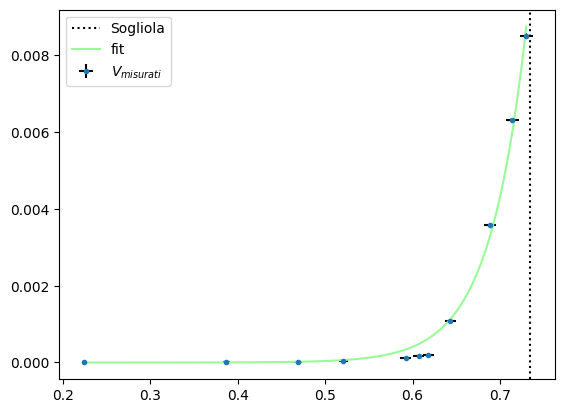

In [172]:
Vd = V[np.where(V < sogliola)]
Id = I[np.where(V < sogliola)]
sId = sigmaI[np.where(V < sogliola)]
sVd = sigmaV[np.where(V < sogliola)]

def shokley(V,I0,g):
    q = 1.60 * (10**-19)
    k = 1.38 * (10**-23)
    T = 300
    return (I0 * (np.exp(q*V / (g * k * T)) - 1))

s = np.sqrt(sId**2 + sVd**2)
i = Interpolazione(Vd,Id,shokley,sId,p0=[2.92156490e-10,1.63])
print(i)
# r = RettaInterpolata(Vd,np.log(Id),np.abs(sId/Id))
# print(r)
# print(i)
# x = np.linspace(min(Vd),max(Vd),100)
# y = shokley(x,1,2)
# plt.plot(x,y)
# plt.errorbar(Vd,np.log(Id),yerr=r.sigmaY,marker='.',linestyle='None',ecolor='black',label='$V_{misurati}$')
# plt.plot(Vd,np.log(Id),marker='.',color='red',label='$V_{misurati}$')
plt.axvline(x=sogliola, color='black', linestyle='dotted', label='Sogliola')
plt.errorbar(Vd,Id,yerr=sId,xerr=sVd,marker='.',linestyle='None',ecolor='black', label='$V_{misurati}$')
plt.plot(i.x_best,i.y_best, color='palegreen',label='fit')
plt.legend()
plt.show()

In [173]:
FILE = dir_path + '/data/' + 'soglia_diodo_crescente.csv'
fr = pd.read_csv(FILE)
I2 = np.array(fr['I(uA)']) * 10**(-6)
sigmaI2percent = 0.01 # 1%
sigmaI2 = I2*sigmaIpercent

V2 = np.array(fr['V'])
sigmaV2percent = 0.01 # 1%
sigmaV2 = V2*sigmaVpercent


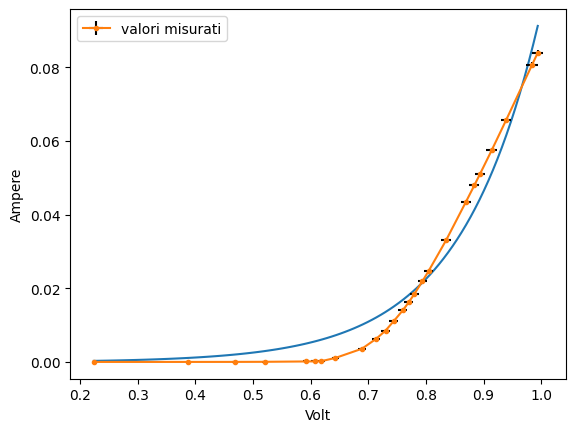

In [174]:
# I = I + V/(10.846*(10**6)) + V/1.18  #+ V / r.B

i = Interpolazione(V,I,shokley,sigmaI,p0=[2.92156490e-10,1.63])

plt.plot(i.x_best, i.y_best)
# plt.errorbar(V2, I2, yerr=sigmaI2, xerr=sigmaV2, marker='.', ecolor='black', label='valori misurati')
plt.errorbar(V,I,yerr=sigmaI,xerr=sigmaV,marker='.',ecolor='black', label='valori misurati')
plt.xlabel('Volt')
plt.ylabel('Ampere')
# 
# plt.yscale('log')
plt.legend()
plt.show()
